# Introduction
The Nobel Prize is a scientific award which given to scientists and scholar in the categories of chemistry, literature, physics, physiology or medicine, economics, and peace. The Nobel Prizes were first awarded in 1901 and take place annually until now.

# Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check Initial Information 

In [2]:
df = pd.read_csv('data/archive.csv')
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
df.describe()

,Year,Laureate ID
count,969.000000,969.000000
mean,1970.287926,470.152735
std,32.937498,274.586623
min,1901.000000,1.000000
25%,1947.000000,230.000000
50%,1976.000000,462.000000
75%,1999.000000,718.000000
max,2016.000000,937.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              940 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null object
Death City              599 non-null object
Death Country           605 non-null object
dtypes: int64(2), object(16)
memory usage: 136.4+ KB


In [5]:
df['Laureate Type'].value_counts()

Individual      939
Organization     30
Name: Laureate Type, dtype: int64

In [6]:
df['Sex'].value_counts()

Male      893
Female     50
Name: Sex, dtype: int64

In [7]:
top10_birth_country = pd.DataFrame(df['Birth Country'].value_counts().head(10))
top10_birth_country

,Birth Country
United States of America,276
United Kingdom,88
Germany,70
France,53
Sweden,30
Japan,29
Russia,20
Netherlands,19
Italy,18
Canada,18


We will take the three top winner birth country from next section

# Starting Data Visualization

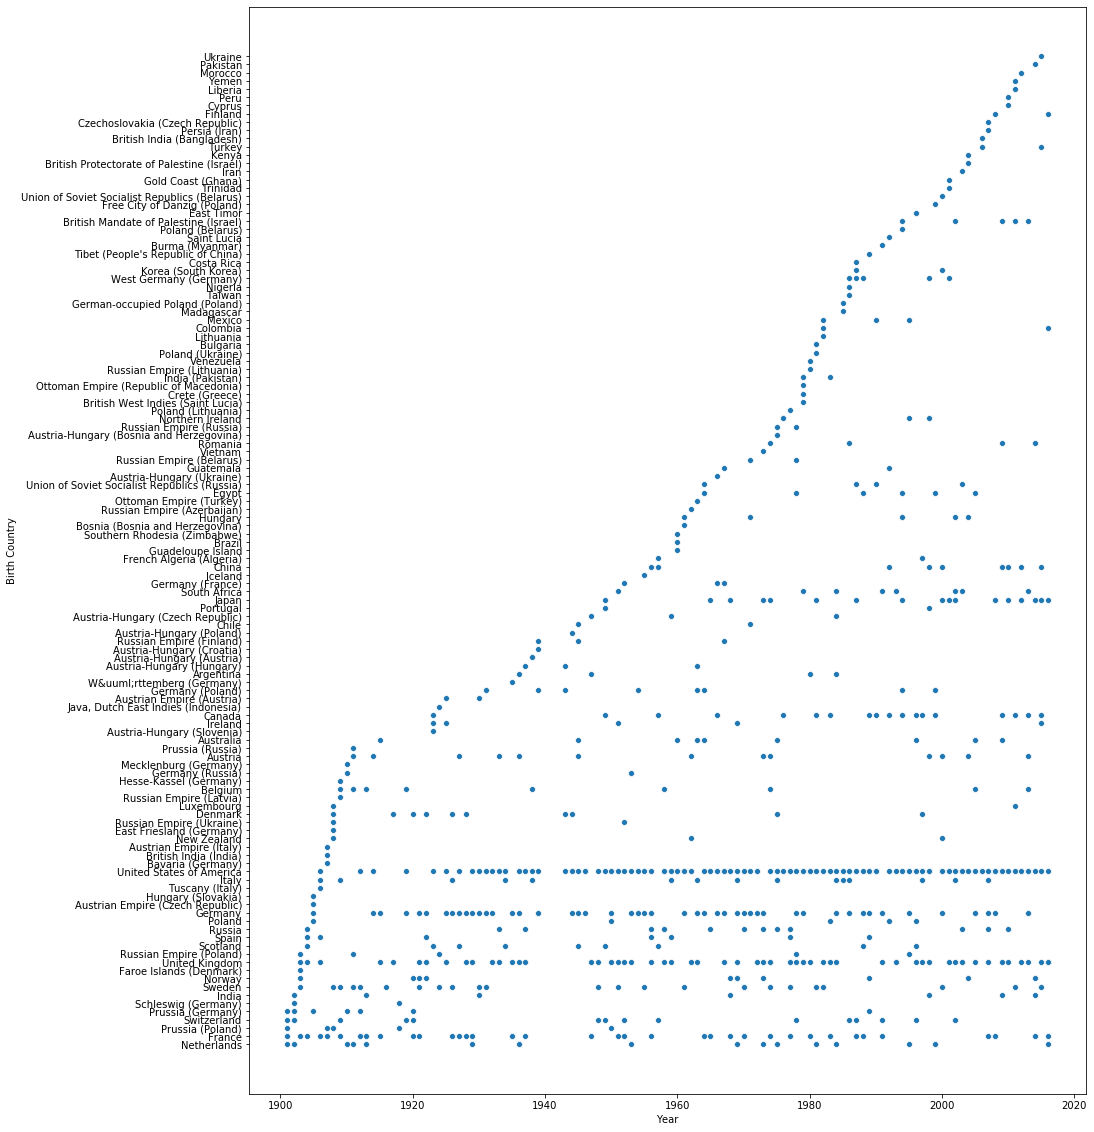

In [8]:
plt.figure(figsize=(15, 20))
_ = sns.scatterplot(x=df['Year'], y=df['Birth Country'])

It's not really related with this section but we can see from the scatterplot above that until about 1910 almost all of the prize winner birth country is from Europe.

## American Born Winner

In [9]:
df['usa_born_winner'] = df['Birth Country'] == 'United States of America'
df['decade'] = (np.floor(df['Year']/10)*10).astype(int) # ini buat bikin dekade, dibuat desimal biar floor ke puluhan

In [10]:
usa_things = df.groupby('decade', as_index=False)['usa_born_winner'].sum()
usa_things.head(12)

,decade,usa_born_winner
0,1900,1.0
1,1910,3.0
2,1920,4.0
3,1930,15.0
4,1940,13.0
5,1950,22.0
6,1960,21.0
7,1970,33.0
8,1980,31.0
9,1990,42.0


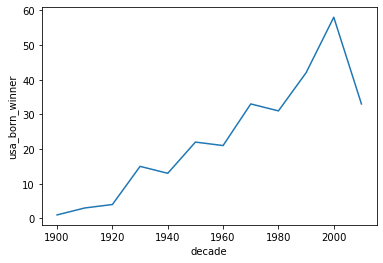

In [11]:
_ = sns.lineplot(x=usa_things.decade, y=usa_things.usa_born_winner)


## UK and Germany Born Winner

In [12]:
df['uk_born_winner'] = df['Birth Country'] == 'United Kingdom'
uk_things = df.groupby('decade', as_index=False)['uk_born_winner'].sum()
uk_things.head(12)

,decade,uk_born_winner
0,1900,3.0
1,1910,2.0
2,1920,7.0
3,1930,10.0
4,1940,3.0
5,1950,10.0
6,1960,7.0
7,1970,14.0
8,1980,5.0
9,1990,6.0


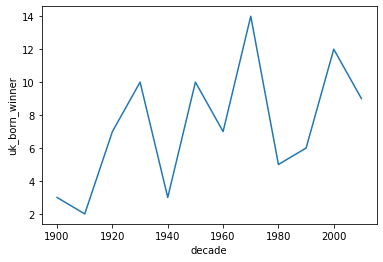

In [13]:
_ = sns.lineplot(x=uk_things.decade, y=uk_things.uk_born_winner)


In [14]:
df['germany_born_winner'] = df['Birth Country'] == 'Germany'
ger_things = df.groupby('decade', as_index=False)['germany_born_winner'].sum()
ger_things.head(12)

,decade,germany_born_winner
0,1900,1.0
1,1910,3.0
2,1920,10.0
3,1930,9.0
4,1940,3.0
5,1950,9.0
6,1960,8.0
7,1970,8.0
8,1980,8.0
9,1990,3.0


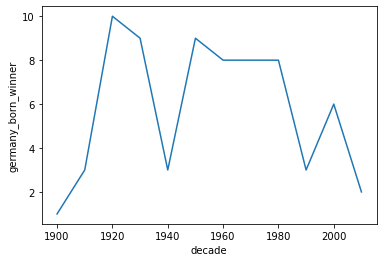

In [15]:
_ = sns.lineplot(x=ger_things.decade, y=ger_things.germany_born_winner)


The spike on USA winner happen in 1930 and gradually increasing each decade, while on germany and UK case the nobel prizes that they got each decade keep going up and down (stable). Those 3 countries are the most countries that getting nobel prizes from 1901 to 2017

## Category

In [16]:
df['Category'].value_counts()

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

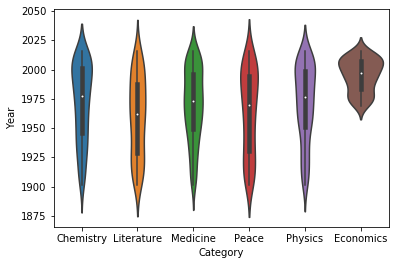

In [17]:
#plt.figure(figsize=(15, 20))
_ = sns.violinplot(x=df['Category'], y=df['Year'])

In [40]:
df['Med'] = df['Category']=='Medicine'
df['Chem'] = df['Category']=='Chemistry'
df['Lit'] = df['Category']=='Literature'
df['Peace'] = df['Category']=='Peace'
df['Phys'] = df['Category']=='Physics'
df['Eco'] = df['Category']=='Economics'

cat = df.groupby('decade', as_index=False)['Med', 'Chem', 'Lit', 'Peace', 'Phys', 'Eco'].sum()
cat

,decade,Med,Chem,Lit,Peace,Phys,Eco
0,1900,12.0,9.0,10.0,14.0,13.0,0.0
1,1910,6.0,8.0,9.0,7.0,10.0,0.0
2,1920,11.0,10.0,10.0,11.0,12.0,0.0
3,1930,15.0,18.0,9.0,9.0,11.0,0.0
4,1940,15.0,9.0,6.0,7.0,8.0,0.0
5,1950,23.0,15.0,10.0,8.0,23.0,0.0
6,1960,25.0,15.0,11.0,9.0,18.0,2.0
7,1970,26.0,16.0,11.0,13.0,26.0,15.0
8,1980,23.0,23.0,10.0,11.0,22.0,10.0
9,1990,21.0,18.0,10.0,17.0,24.0,17.0


In [41]:
df[df['Category'] == 'Economics'].nsmallest(5, 'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,decade,uk_born_winner,germany_born_winner,Med,Chem,Lit,Peace,Phys,Eco,Count
410,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,677,Individual,Ragnar Frisch,1895-03-03,Oslo,...,1960,False,False,False,False,False,False,False,True,NaN
411,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,678,Individual,Jan Tinbergen,1903-04-12,the Hague,...,1960,False,False,False,False,False,False,False,True,NaN
419,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,679,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",...,1970,False,False,False,False,False,False,False,True,NaN
428,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,680,Individual,Simon Kuznets,1901-04-30,Pinsk,...,1970,False,False,False,False,False,False,False,True,NaN
436,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,681,Individual,John R. Hicks,1904-04-08,Warwick,...,1970,True,False,False,False,False,False,False,True,NaN


The economics category was established on 1969 and the first two person that get the nobel on that year was from Norway and Netherland. From that year, there are winner in this category keep increasing and their number of winner goes beyond Literature category which established prior.

In [178]:
decade_count = pd.DataFrame(df.groupby('decade', as_index=False).size().reset_index(name='Count'))
decade_count.head()

,decade,Count
0,1900,58
1,1910,40
2,1920,54
3,1930,62
4,1940,45


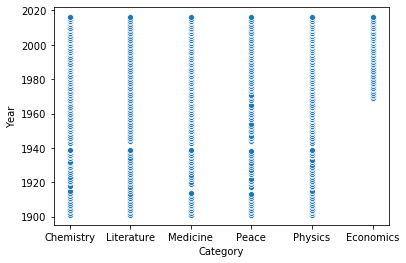

In [28]:
_ = sns.scatterplot(x=df['Category'], y=df['Year'])

In [54]:
df.loc[df['Year'].isin([1939, 1940, 1941, 1942, 1943])]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,decade,uk_born_winner,germany_born_winner,Med,Chem,Lit,Peace,Phys,Eco,Count
208,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on sex hormones""",1/2,199,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,...,1930,False,True,False,True,False,False,False,False,NaN
209,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on sex hormones""",1/2,199,Individual,Adolf Friedrich Johann Butenandt,1903-03-24,Bremerhaven-Lehe,...,1930,False,True,False,True,False,False,False,False,NaN
210,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on polymethylenes and higher ter...",1/2,200,Individual,Leopold Ruzicka,1887-09-13,Vukovar,...,1930,False,False,False,True,False,False,False,False,NaN
211,1939,Literature,The Nobel Prize in Literature 1939,"""for his deep understanding of his country's p...",1/1,613,Individual,Frans Eemil Sillanpää,1888-09-16,Hämeenkyrö,...,1930,False,False,False,False,True,False,False,False,NaN
212,1939,Medicine,The Nobel Prize in Physiology or Medicine 1939,"""for the discovery of the antibacterial effect...",1/1,334,Individual,Gerhard Domagk,1895-10-30,Lagow,...,1930,False,False,True,False,False,False,False,False,NaN
213,1939,Physics,The Nobel Prize in Physics 1939,"""for the invention and development of the cycl...",1/1,47,Individual,Ernest Orlando Lawrence,1901-08-08,"Canton, SD",...,1930,False,False,False,False,False,False,True,False,NaN
214,1943,Chemistry,The Nobel Prize in Chemistry 1943,"""for his work on the use of isotopes as tracer...",1/1,201,Individual,George de Hevesy,1885-08-01,Budapest,...,1940,False,False,False,True,False,False,False,False,NaN
215,1943,Medicine,The Nobel Prize in Physiology or Medicine 1943,"""for his discovery of vitamin K""",1/2,335,Individual,Henrik Carl Peter Dam,1895-02-21,Copenhagen,...,1940,False,False,True,False,False,False,False,False,NaN
216,1943,Medicine,The Nobel Prize in Physiology or Medicine 1943,"""for his discovery of the chemical nature of v...",1/2,336,Individual,Edward Adelbert Doisy,1893-11-13,"Hume, IL",...,1940,False,False,True,False,False,False,False,False,NaN
217,1943,Physics,The Nobel Prize in Physics 1943,"""for his contribution to the development of th...",1/1,48,Individual,Otto Stern,1888-02-17,Sorau (Zory),...,1940,False,False,False,False,False,False,True,False,NaN


From the scatter plot above we can see that there is a gap year on 1940 until 1942 which has no winner at all. We ensure this again by selecting the data around that year on the table above. The gap on 1940 - 1942 happened because there was World War II happen at that time. When World War II happen there is no nobel prize winner. If we see again thoroughly, there is more gap on peace category. This is because the 1939 peace prize was not awarded.

## Age of winner

In [115]:
df['Birth Date'] = df['Birth Date'].replace(['1943-00-00'], '1943-01-01')
df['Birth Date'] = df['Birth Date'].replace(['1898-00-00'], '1898-01-01')
# there are 2 data that showing month and day as 00 so we replace it to 1 january to make things easier

In [120]:
df['Birth Date'] = pd.to_datetime(df['Birth Date'])
df['Age'] = df['Year'] - df['Birth Date'].dt.year

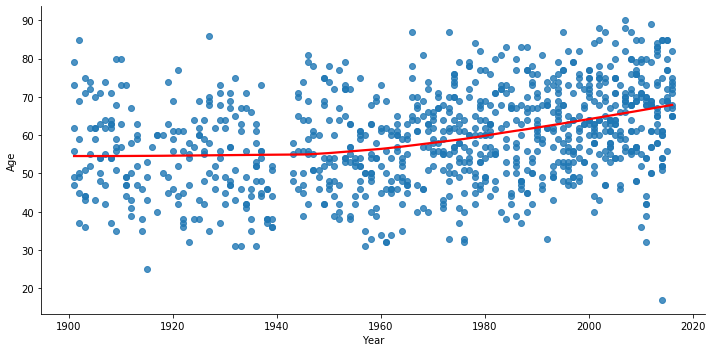

In [133]:
_ = sns.lmplot(x='Year', y='Age', data=df, lowess=True, aspect=2, line_kws={'color' : 'red'})

We can see from the plot above that the average age of Nobel Prize winner is higher than in early 1900s, also we can see that there are two person that win Noble Prize when they below 30 years old.

In [160]:
df[df.Age < 30].loc[:,['Year', 'Category', 'Full Name', 'Birth Date', 'Birth Country', 'Age']]

,Year,Category,Full Name,Birth Date,Birth Country,Age
86,1915,Physics,William Lawrence Bragg,1890-03-31,Australia,25.0
940,2014,Peace,Malala Yousafzai,1997-07-12,Pakistan,17.0


The two person above are the two youngest Nobel Prize winner from 1901 - 2017 which is fantastic. The youngest one was 17 years old by 2014 and a female! While the second youngest person win Physics category which is really an achievement at that age. With this information we also want to know who are the oldest person when he/she received Nobel Prize.

In [159]:
df.nlargest(1, 'Age').loc[:,['Year', 'Category', 'Full Name', 'Birth Date', 'Birth Country', 'Age']]

,Year,Category,Full Name,Birth Date,Birth Country,Age
825,2007,Economics,Leonid Hurwicz,1917-08-21,Russia,90.0


## Female Winner

In [163]:
# I did this at start to see the value of female winner but its annoying to keep scrolling above
df['Sex'].value_counts()

Male      893
Female     50
Name: Sex, dtype: int64

The amount of female winner is so much smaller than male winner, this is probably because the world use to be male-centric back then so we will see it by the plot below

In [177]:
sex_count = pd.DataFrame(df.groupby(['Year', 'Sex'], as_index=False).size().reset_index(name='Count'))
sex_count.head()

,Year,Sex,Count
0,1901,Male,6
1,1902,Male,7
2,1903,Female,1
3,1903,Male,6
4,1904,Male,5


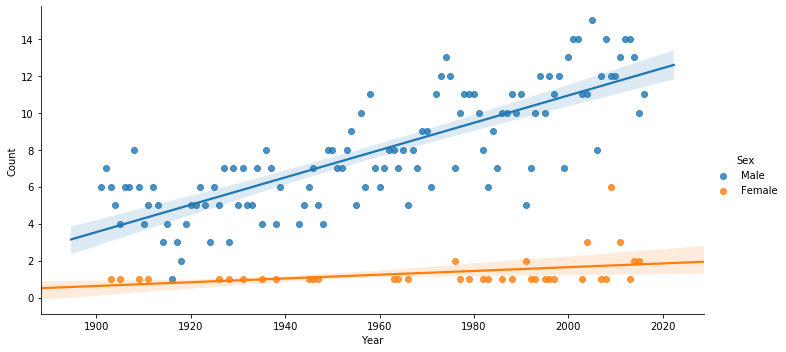

In [181]:
_ = sns.lmplot(x='Year', y='Count', data=categoric, hue='Sex', aspect=2)

The plot above shows us that until 1970s there was either one or zero female winner. But the regression plot is increasing nowadays which shows us that female began to more recognized on 1980s which is the era of second-wave feminism (1960s - 1980s) <br>
source: `https://en.wikipedia.org/wiki/History_of_feminism`

In [183]:
df[df['Sex'] == 'Female'].nsmallest(1, 'Year').loc[:,['Year', 'Category', 'Full Name', 'Birth Date', 'Birth Country', 'Age']]

,Year,Category,Full Name,Birth Date,Birth Country,Age
19,1903,Physics,"Marie Curie, née Sklodowska",1867-11-07,Russian Empire (Poland),36.0


Also the first female winner is Marie Curie which categorized in Physics. Her achievement at that time was developing theory of radioactivity. She didn't stop there, 8 years later she won another prize in Chemistry for her discovery of Polonium and Radium. <br>
source: `https://en.wikipedia.org/wiki/Marie_Curie`

In [185]:
df[df['Full Name'] == 'Marie Curie, née Sklodowska'].loc[:,['Year', 'Category', 'Full Name', 'Birth Date', 'Birth Country', 'Age']]

,Year,Category,Full Name,Birth Date,Birth Country,Age
19,1903,Physics,"Marie Curie, née Sklodowska",1867-11-07,Russian Empire (Poland),36.0
63,1911,Chemistry,"Marie Curie, née Sklodowska",1867-11-07,Russian Empire (Poland),44.0
